In [1]:
from scipy import *
from astropy.io import fits
import WLanalysis

In [2]:
plane_massive = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data
plane_massles = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data

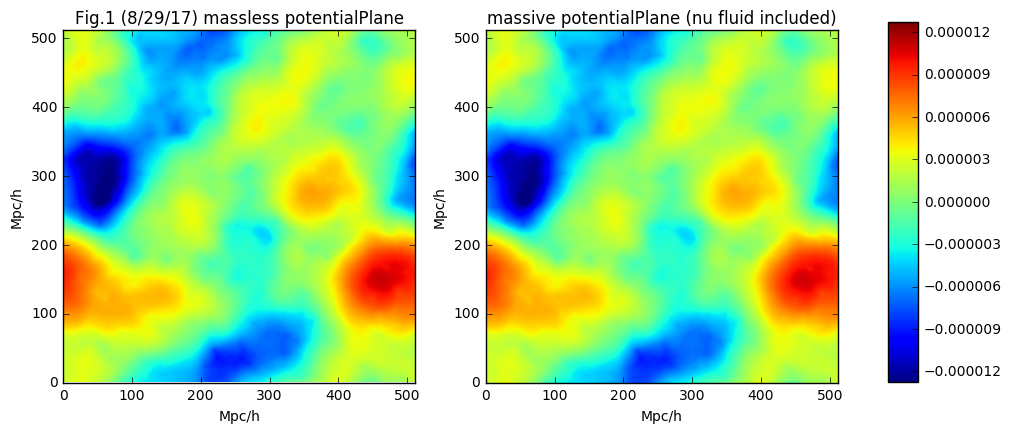

In [3]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

istd=std(plane_massles)
clb1=ax1.imshow(plane_massles,extent=[0,512, 0,512],vmin=-3*istd,vmax=3*istd)
ax1.set_xlabel('Mpc/h')
ax1.set_ylabel('Mpc/h')
ax1.set_title('Fig.1 (8/29/17) massless potentialPlane')

ax2.imshow(plane_massive,extent=[0,512, 0,512],vmin=-3*istd,vmax=3*istd)
ax2.set_xlabel('Mpc/h')
ax2.set_ylabel('Mpc/h')
ax2.set_title('massive potentialPlane (nu fluid included)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb1, cax=cbar_ax)
show()

In [5]:
conv_massive_z1 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data
conv_massles_z1 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data

In [6]:
conv_massive_z1100 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data
conv_massles_z1100 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data

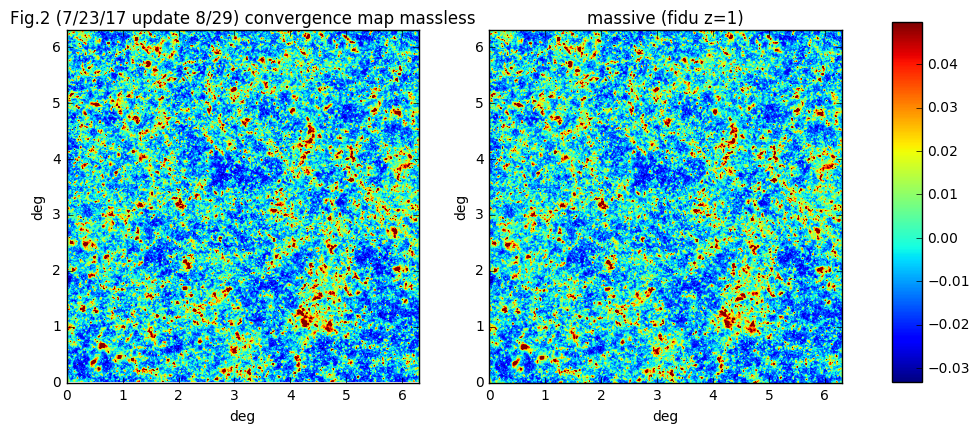

In [7]:
istd = std(conv_massive_z1)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2 (7/23/17 update 8/29) convergence map massless')

clb2=ax2.imshow(conv_massive_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

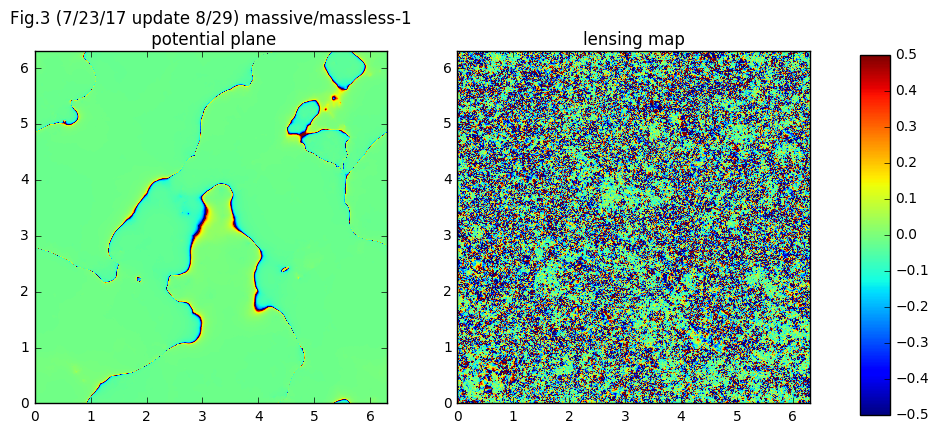

In [8]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massive/plane_massles-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)

clb2=ax2.imshow(conv_massive_z1/conv_massles_z1-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)
cbar_ax2 = f.add_axes([0.95, 0.2, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax2)

ax1.set_title('Fig.3 (7/23/17 update 8/29) massive/massless-1\n potential plane')
ax2.set_title('lensing map')

show()

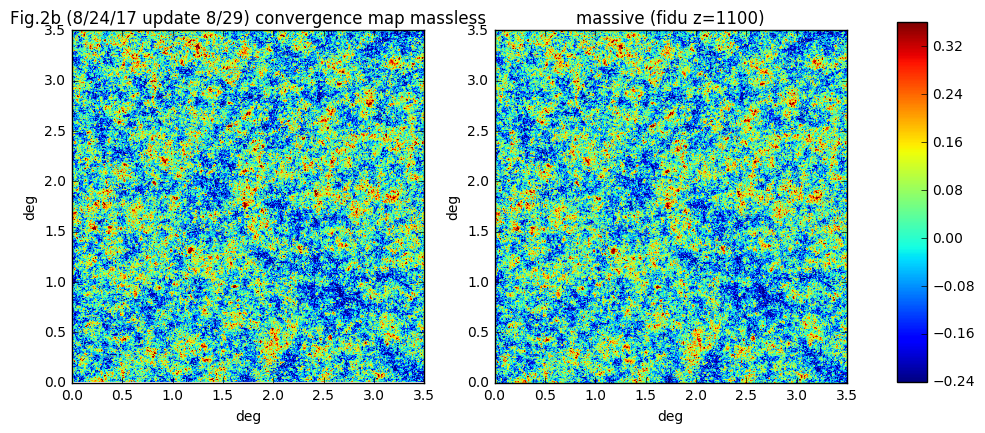

In [9]:
istd = std(conv_massive_z1100)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1100,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2b (8/24/17 update 8/29) convergence map massless')

clb2=ax2.imshow(conv_massive_z1100,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1100)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [11]:
# ell0_As, ps0_As = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_As').T
# ell0_s8, ps0_s8 = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_s8').T
# ell0_s8_linear, ps0_s8_linear = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_massless_s8_linear').T

In [43]:
def ps_gen (fn,sizedeg=3.5**2):
    ikappamap = fits.open(fn)[0].data
    ell, ps = WLanalysis.PowerSpectrum(ikappamap, sizedeg = sizedeg)
    return ell, ps

In [13]:
out0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps0_z1 = mean(out0, axis=0)

out1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps1_z1 = mean(out1, axis=0)

/Users/jia/Documents/code/WLanalysis/WLanalysis.py:527: RuntimeWarning: invalid value encountered in divide
  radial_prof = tbin/hist_ind[1:]


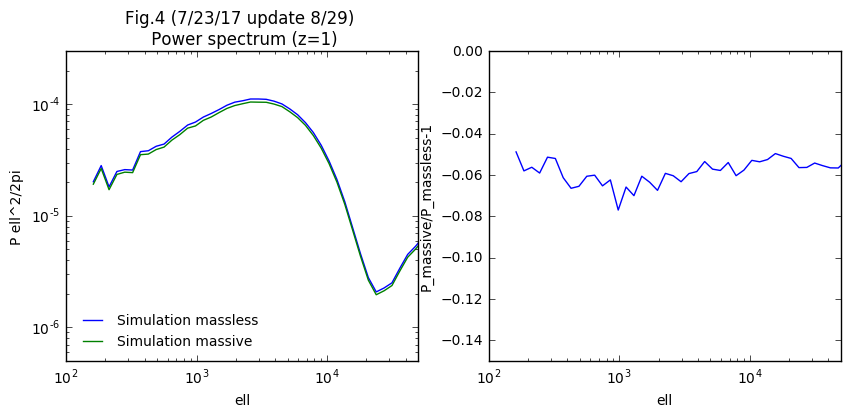

In [16]:
f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell, ps0_z1,label='Simulation massless')
ax1.loglog(ell, ps1_z1,label='Simulation massive')
#loglog(ell_As, ps_As,'--',label='nicaea, normalization=A_s')
#ax1.loglog(ell0_s8, ps0_s8,'--',label='Takahashi+12 massless')
#ax1.loglog(ell0_s8_linear, ps0_s8_linear,'--',label='Linear massless')
#loglog(ell_nicaea_linear, ps_nicaea_linear,'--')
ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(5e-7, 3e-4)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.4 (7/23/17 update 8/29) \n Power spectrum (z=1)')


ax2.plot(ell, ps1_z1/ps0_z1-1)
ax2.set_xscale('log')
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.15,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

In [13]:
#ell0_s8cmb, ps0_s8cmb = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_1100').T

In [17]:
out1100_0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,5)])

ell1100, ps0_z1100 = mean(out1100_0, axis=0)

out1100_1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,5)])

ell1100, ps1_z1100 = mean(out1100_1, axis=0)

In [18]:
#out1100_0_highresplane = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/plane8192/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
#                 for i in range(1,6)])

#ell1100_highresplane, ps0_z1100_highresplane = mean(out1100_0, axis=0)

In [19]:
from scipy.interpolate import interp1d

k_arr = logspace(-2,1.5,100)

####### test matter power spectrum for massive P_cdm vs P_matter
kcamb0_z2, Ptot0_z2 = loadtxt('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

kTF_z2, Ttot_z2, Tnn_z2, Tnu_z2 = loadtxt('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7,5]]
kcamb_z2, Ptot_z2 = loadtxt('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T

Ptot0_z2_interp = interp1d(kcamb0_z2, Ptot0_z2)(k_arr)
Ptot_z2_interp = interp1d(kcamb_z2, Ptot_z2)(k_arr)

ratio_nn = interp1d(kTF_z2, (Tnn_z2/Ttot_z2)**2)(k_arr)

Pnonu_z2_interp = Ptot_z2_interp * ratio_nn

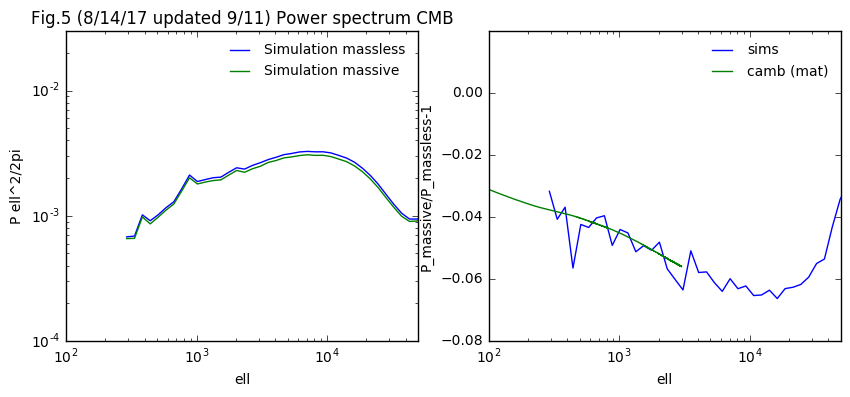

In [22]:
kmat0, pmat0 = loadtxt('camb/camb_mat_massless.txt').T
kmat1, pmat1 = loadtxt('camb/camb_mat_massive.txt').T

f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell1100, ps0_z1100,label='Simulation massless')
#ax1.loglog(ell1100_highresplane, ps0_z1100_highresplane,label='Simulation massless(high res)')
ax1.loglog(ell1100, ps1_z1100,label='Simulation massive')
#ax1.loglog(ell0_s8cmb, ps0_s8cmb,'--',label='Takahashi+12 massless')

ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(1e-4, 3e-2)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.5 (8/14/17 updated 9/11) Power spectrum CMB')

ax2.plot(ell1100, ps1_z1100/ps0_z1100-1, label='sims')
#ax2.plot(ell1100, ps1_z1100/mean(ratio_nn)/ps0_z1100-1, label='sims * (P_cdm_bary_nu / P_cdm_bary)')
ax2.plot(kmat1, pmat1/pmat0-1,label='camb (mat)')
#ax2.plot(ell1100_highresplane, ps0_z1100_highresplane/ps0_z1100-1,label='Simulation massless(high res)')
ax2.set_xscale('log')
ax2.legend(loc=0,frameon=0,fontsize=10)
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.08,0.02)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

In [23]:
kbird0,pbird_tot0 = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.00000_om0.30000_As2.1000/powerspec_tot_066.txt').T
kbird1,pbird_tot = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_tot_066.txt').T
kbird1,pbird_nu = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_nu_066.txt').T

kbird0 *= 1e3
kbird1 *= 1e3

pbird_tot0 *=1e-9
pbird_tot *=1e-9
pbird_nu *= 1e-9

pbird_tot0 = interp1d(kbird0,pbird_tot0,fill_value='extrapolate')(k_arr)
pbird_tot = interp1d(kbird1,pbird_tot,fill_value='extrapolate')(k_arr)
pbird_nu = interp1d(kbird1,pbird_nu,fill_value='extrapolate')(k_arr)

fnu=0.0073037589525825385
pbird_nonu = (sqrt(pbird_tot) - fnu*sqrt(pbird_nu))**2/(1-fnu)**2

/Users/jia/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


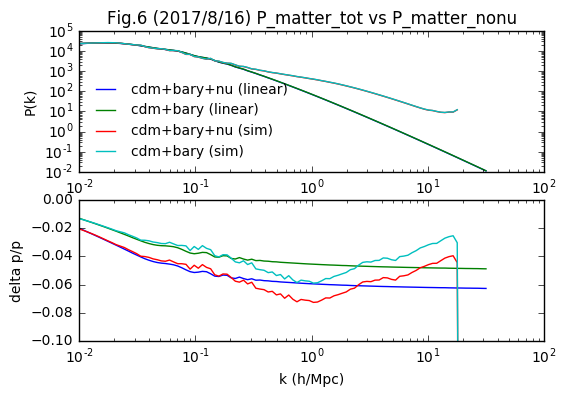

In [24]:
f=figure(figsize=(6,4))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

ax1.loglog(k_arr, Ptot_z2_interp,label='cdm+bary+nu (linear)')
ax1.loglog(k_arr, Pnonu_z2_interp,label='cdm+bary (linear)')
ax1.loglog(k_arr, pbird_tot,label='cdm+bary+nu (sim)')
ax1.loglog(k_arr, pbird_nonu,label='cdm+bary (sim)')

ax1.set_ylabel('P(k)')
ax1.set_title('Fig.6 (2017/8/16) P_matter_tot vs P_matter_nonu')
ax1.legend(frameon=0,fontsize=10, loc=0)

ax2.plot(k_arr, Ptot_z2_interp/Ptot0_z2_interp-1, label='cdm+bary+nu')
ax2.plot(k_arr, Pnonu_z2_interp/Ptot0_z2_interp-1, label='cdm+bary')
ax2.plot(k_arr, pbird_tot/pbird_tot0-1, label='cdm+bary+nu')
ax2.plot(k_arr, pbird_nonu/pbird_tot0-1, label='cdm+bary')


ax2.set_xlabel('k (h/Mpc)')
ax2.set_xscale('log')
ax2.set_ylabel('delta p/p')
ax2.set_ylim(-0.1,0)
#ax2.legend(frameon=0)
show()

In [20]:
savetxt('ps_massless1-9.txt',array([ell1100, ps0_z1100]).T)
savetxt('ps_massive1-9.txt',array([ell1100, ps1_z1100]).T)

In [25]:
recon_massive = fits.open('sample_maps/jia_recon_massive_000000999.fits')[0].data
recon_massless = fits.open('sample_maps/jia_recon_massless_000000999.fits')[0].data

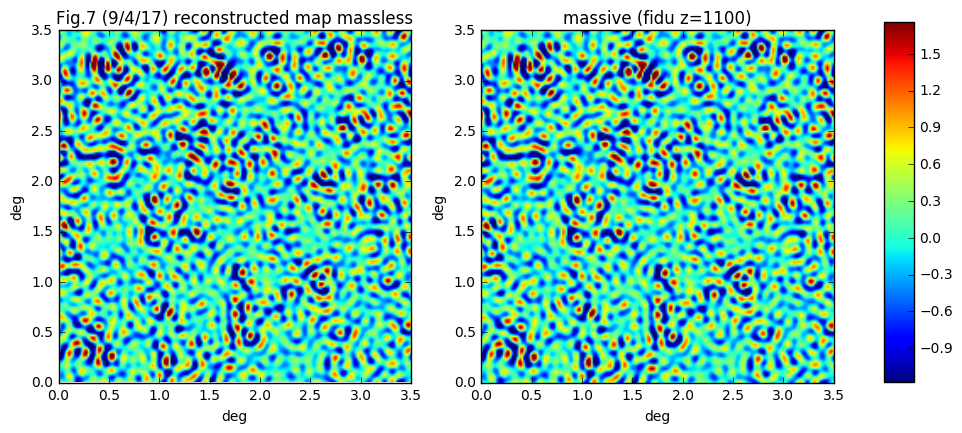

In [26]:
istdr = std(recon_massive)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(recon_massless,extent=[0,3.5, 0,3.5],vmin=-2*istdr, vmax=3*istdr)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.7 (9/4/17) reconstructed map massless')

clb2=ax2.imshow(recon_massive,extent=[0,3.5, 0,3.5],vmin=-2*istdr, vmax=3*istdr)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1100)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [27]:
thetaG = 1.0/(3.5*60/2048)
recon_massless_smooth = WLanalysis.smooth(recon_massless,thetaG)
recon_massive_smooth = WLanalysis.smooth(recon_massive,thetaG)

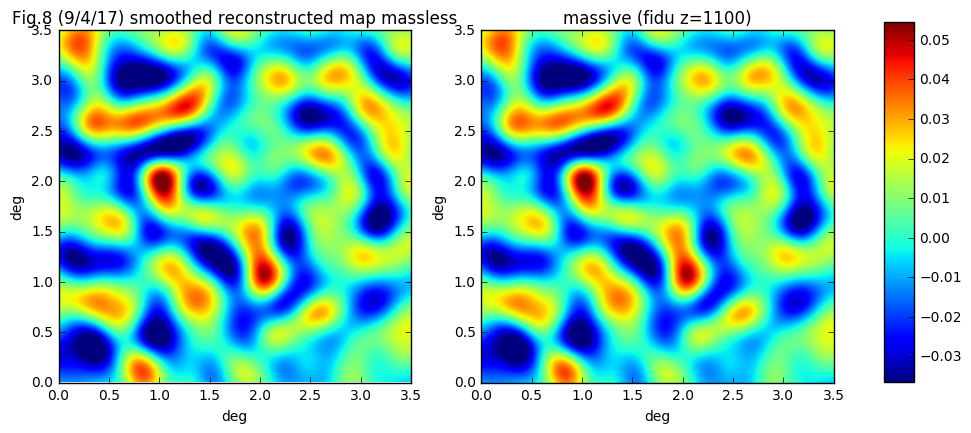

In [28]:
istdr = std(recon_massive_smooth)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(recon_massless_smooth,extent=[0,3.5, 0,3.5],vmin=-2*istdr, vmax=3*istdr)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.8 (9/4/17) smoothed reconstructed map massless')

clb2=ax2.imshow(recon_massive_smooth,extent=[0,3.5, 0,3.5],vmin=-2*istdr, vmax=3*istdr)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1100)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

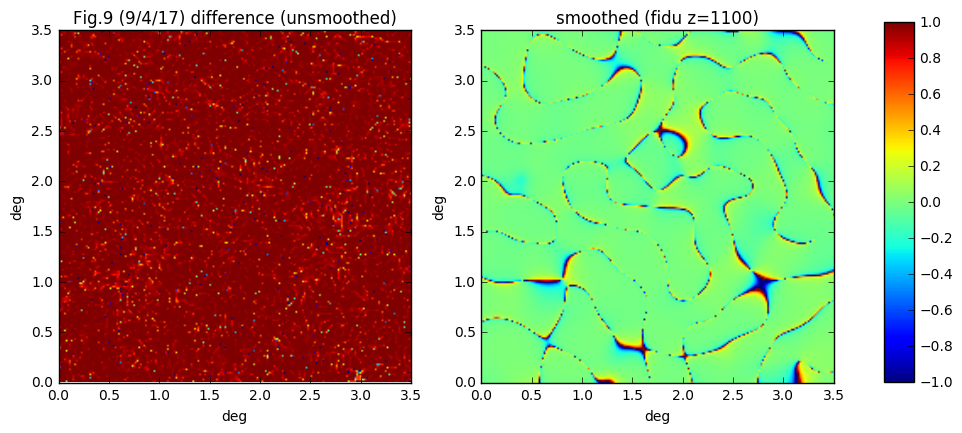

In [29]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(recon_massless/recon_massive,extent=[0,3.5, 0,3.5],vmin=-1, vmax=1)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.9 (9/4/17) difference (unsmoothed)')

clb2=ax2.imshow(recon_massive_smooth/recon_massless_smooth-1,extent=[0,3.5, 0,3.5],vmin=-1, vmax=1)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('smoothed (fidu z=1100)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [85]:
kmap2048=fits.open('sample_maps/kmap_0.1eV_2048.fits')[0].data
kmap512=fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_0001r_512pix.fits')[0].data

kmap2048new=fits.open('sample_maps/kmap_0.1eV_2048new.fits')[0].data
kmap2048_0evnew=fits.open('sample_maps/kmap_0.0eV_2048new.fits')[0].data

kmap2048_0ev=fits.open('sample_maps/kmap_0.0eV_2048.fits')[0].data
kmap512_0ev=fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_0001r_512pix.fits')[0].data

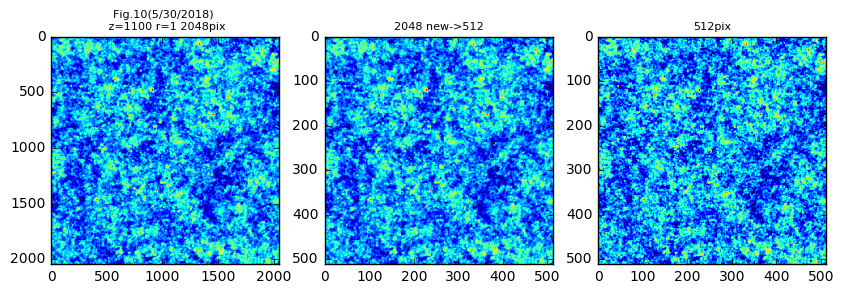

In [116]:
f, (ax1,ax2,ax3)=subplots(1,3,figsize=(10,3))
cb1=ax1.imshow(WLanalysis.smooth(kmap2048,4),interpolation='nearest',vmin=-0.2,vmax=0.5)
cb2=ax2.imshow(WLanalysis.smooth(kre,1),interpolation='nearest',vmin=-0.2,vmax=0.5)
cb3=ax3.imshow(WLanalysis.smooth(kmap512,1),interpolation='nearest',vmin=-0.2,vmax=0.5)

#f.colorbar(cb3,ax=ax3)
ax1.set_title('Fig.10(5/30/2018) \n z=1100 r=1 2048pix', fontsize=8)
ax2.set_title('2048 new->512', fontsize=8)
ax3.set_title('512pix', fontsize=8)
#plt.tight_layout()
show()

In [102]:
iedges=logspace(log10(1),log10(256))
ps2048 = WLanalysis.PowerSpectrum(kmap2048, sizedeg = 12.25,edges=iedges)
ps512 = WLanalysis.PowerSpectrum(kmap512, sizedeg = 12.25,edges=iedges)

ps2048_0ev = WLanalysis.PowerSpectrum(kmap2048_0ev, sizedeg = 12.25,edges=iedges)
ps512_0ev = WLanalysis.PowerSpectrum(kmap512_0ev, sizedeg = 12.25,edges=iedges)

In [121]:
kre=mean(kmap2048new.reshape(512,4,512,4),axis=(1,3))
kre0=mean(kmap2048_0evnew.reshape(512,4,512,4),axis=(1,3))
psre = WLanalysis.PowerSpectrum(kre, sizedeg = 12.25,edges=iedges)
psre_0ev = WLanalysis.PowerSpectrum(kre0, sizedeg = 12.25,edges=iedges)
ps2048new = WLanalysis.PowerSpectrum(kmap2048new[1::4,1::4], sizedeg = 12.25,edges=iedges)
ps2048_0evnew = WLanalysis.PowerSpectrum(kmap2048_0evnew[1::4,1::4], sizedeg = 12.25,edges=iedges)


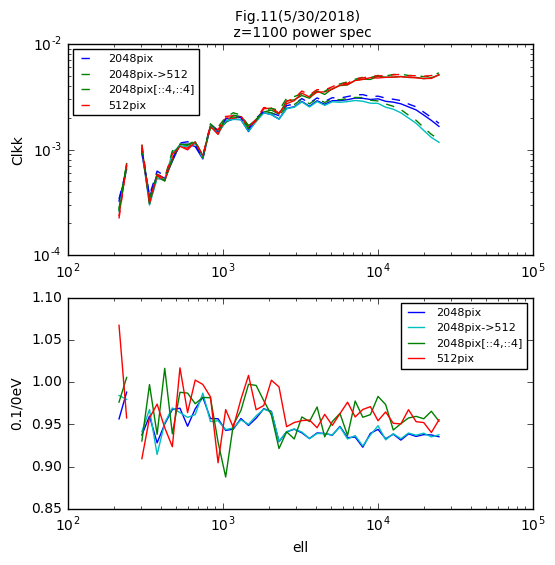

In [122]:
f, (ax,ax2)=subplots(2,1,figsize=(6,6))
ax.plot(ps2048[0],ps2048[1],'b')
ax.plot(ps2048new[0],ps2048new[1],'g')
ax.plot(psre[0],psre[1],'c')
ax.plot(ps512[0],ps512[1],'r')
ax.plot(ps2048_0ev[0],ps2048_0ev[1],'b--',label='2048pix')
ax.plot(psre_0ev[0],psre_0ev[1],'g--',label='2048pix->512')
ax.plot(ps2048_0evnew[0],ps2048_0evnew[1],'g--',label='2048pix[::4,::4]')
ax.plot(ps512_0ev[0],ps512_0ev[1],'r--',label='512pix')

ax.set_xscale('log')
ax.set_yscale('log')

ax2.plot(ps2048[0],ps2048[1]/ps2048_0ev[1],'b-',label='2048pix')
ax2.plot(ps2048[0],psre[1]/psre_0ev[1],'c-',label='2048pix->512')
ax2.plot(ps2048[0],ps2048new[1]/ps2048_0evnew[1],'g-',label='2048pix[::4,::4]')
ax2.plot(ps512[0],ps512[1]/ps512_0ev[1],'r-',label='512pix')
ax2.set_xscale('log')
ax2.set_xlabel('ell')
ax.set_ylabel('Clkk')
ax2.set_ylabel('0.1/0eV')
ax.legend(fontsize=8,loc='best')
ax2.legend(fontsize=8)
#ax.set_xlim(1e2,1e4)
#ax2.set_xlim(1e2,1e4)

ax.set_title('Fig.11(5/30/2018) \n z=1100 power spec', fontsize=10)
show()

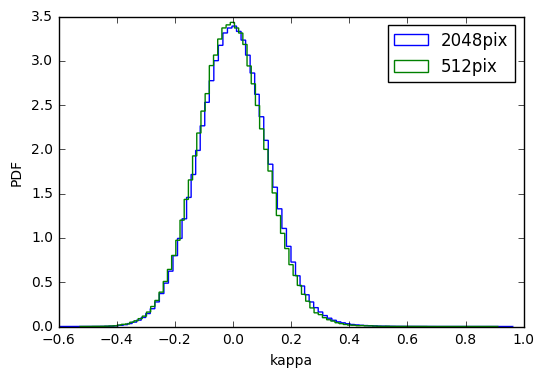

In [60]:
hist(kmap2048.flatten(), bins=100, normed=1,histtype='step',label='2048pix')
hist(kmap512.flatten(), bins=100, normed=1,histtype='step',label='512pix')
xlabel('kappa')
ylabel('PDF')
legend()
show()

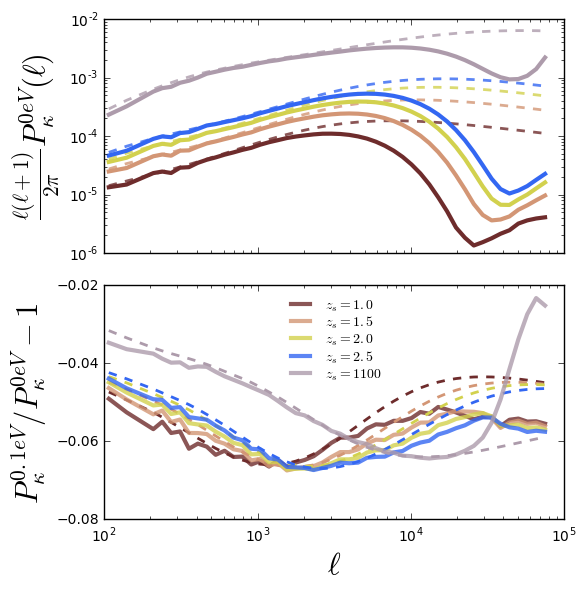

In [101]:
zs_arr=[1.0, 1.5, 2.0, 2.5, 1100]
def pkappa_gen (zs):
    ps0_all = load('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/sample_maps/jose/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/1024b512/Maps%02d/PS_50.npy'%(zs*10))
    ps1_all = load('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/sample_maps/jose/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/1024b512/Maps%02d/PS_50.npy'%(zs*10))
    ps0TH_all = load('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/sample_maps/jose/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/1024b512/Maps%02d/PS_50_TH.npy'%(zs*10))
    ps1TH_all = load('/Users/jia/Dropbox/weaklensing/kspace_nu/neutrino-batch/sample_maps/jose/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/1024b512/Maps%02d/PS_50_TH.npy'%(zs*10))
    ##[None,'original','bird','peacock','takahashi','mead','halomodel','casarini']
    ps0 = mean(ps0_all[1:],axis=0)
    idx=where(ps0>0)[0]
    ell = ps0_all[0][idx]
    ps0 = mean(ps0_all[1:],axis=0)[idx]
    ps1 = mean(ps1_all[1:],axis=0)[idx]
    pstd0 = std(ps0_all[1:],axis=0)[idx]
    pstd1 = std(ps1_all[1:],axis=0)[idx]
    pcamb0 = ps0TH_all[[1,3,5],:][:,idx]
    pcamb1 = ps1TH_all[[1,3,5],:][:,idx]
    return ell, ps0, ps1, pstd0, pstd1, pcamb0, pcamb1

############  plots
f=figure(figsize=(6,6))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

seed(103)
for izs in zs_arr:
    icolor=rand(3)
    #colors.pop(0)
    ell, ps0, ps1, pstd0, pstd1, pcamb0, pcamb1 = pkappa_gen(izs)
    ie=ell*(1+ell)/2/pi
    ax1.plot(ell, ie*pcamb0[2], '--',color=icolor,lw=2, alpha=0.8, label=r'$z_s=%s$'%(izs)  )
    ax1.plot(ell,ie*ps0,'-',color=icolor, lw=3)#ie*pstd0/sqrt(1000.)

    ax2.plot(ell,pcamb1[2]/pcamb0[2]-1,'--',color=icolor,lw=2)
    ax2.plot(ell,ps1/ps0-1,'-',color=icolor,lw=3, alpha=0.8, label=r'$z_s=%s$'%(izs))


ax1.set_ylabel(r'$\frac{\ell(\ell+1)}{2\pi}P_{\kappa}^{0 eV}(\ell)$',fontsize=22)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(100, 1e5)
ax1.set_ylim(1e-6, 1e-2)

ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,labelspacing=0.11,columnspacing=0.3)
#ax1.set_yticklabels(fontsize=16)
ax2.set_xscale('log')
ax2.set_xlim(100, 1e5)
ax2.set_ylim(-0.08,-0.02)
ax2.set_xlabel(r'$\ell$',fontsize=22)
ax2.set_ylabel(r'$P_{\kappa}^{0.1eV} / P_{\kappa}^{0 eV} - 1$',fontsize=22)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.09,left=0.15)
ax2.locator_params(axis = 'y', nbins = 5)
plt.tight_layout()
show()

In [142]:
pss = []
for iz in list(arange(0.5,3,0.5))+[1100.,]:
    kmap0=fits.open('sample_maps/kmap_%02d_0.0ev.fits'%(iz*10))[0].data
    kmap1=fits.open('sample_maps/kmap_%02d_0.1ev.fits'%(iz*10))[0].data

    kre0=mean(kmap0.reshape(512,4,512,4),axis=(1,3))
    kre1=mean(kmap1.reshape(512,4,512,4),axis=(1,3))

    pss.append([WLanalysis.PowerSpectrum(ikmap, 
            sizedeg = 12.25,edges=iedges) 
            for ikmap in (kmap0,kmap1, kmap0[::4,::4], kmap1[::4,::4], kre0, kre1)])
ell=pss[0][0]


In [135]:
print len(pss)

5


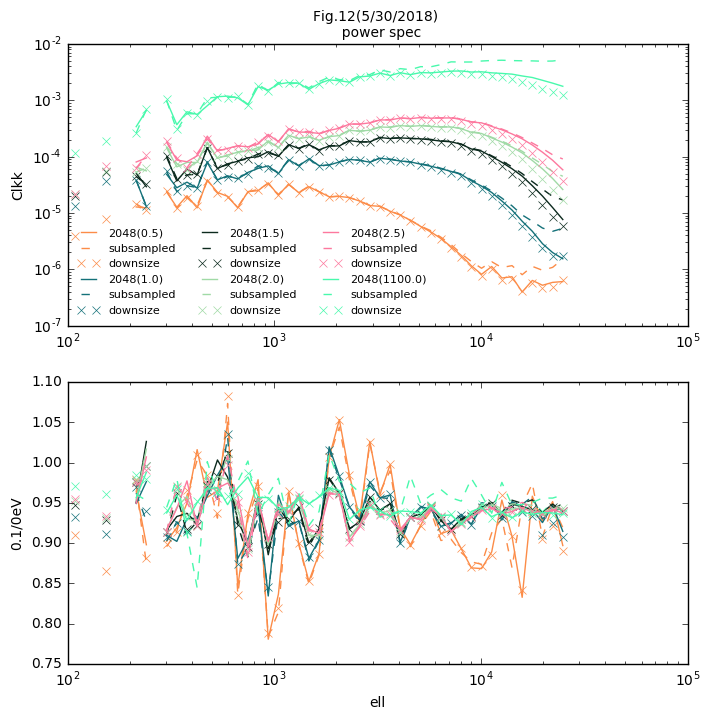

In [143]:
f, (ax,ax2)=subplots(2,1,figsize=(8,8))
seed(45)
k=-1
for iz in list(arange(0.5,3,0.5))+[1100.,]:
    k+=1
    ps0, ps1, ps40, ps41, pre0, pre1 = pss[k]
    
    ell=ps0[0]
    icolor=rand(3)
    for j in range(3):        
        ax.plot(ell,[ps0,ps40,pre0][j][1],['-','--','x'][j],color=icolor,label=['2048(%s)'%(iz),'subsampled','downsize'][j])
        ax2.plot(ell,[ps1[1]/ps0[1],ps41[1]/ps40[1],pre1[1]/pre0[1]][j],['-','--','x'][j],color=icolor)
ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('ell')
ax.set_ylabel('Clkk')
ax2.set_ylabel('0.1/0eV')
ax.legend(fontsize=8,loc='best',frameon=0,ncol=3)
ax2.legend(fontsize=8)

ax.set_title('Fig.12(5/30/2018) \n  power spec', fontsize=10)
show()
    